# Deep Learning with Tensorflow

In [2]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.19.0


### We shall use the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset to train our Machine Learning model

MNIST dataset contains hand-written digits from 0 t0 9. The training and test datasets have 60,000 and 10,000 images respectively, and they are classified based on the digit they represent. We shall use the Keras API to fetch the dataset.

In [3]:
train_data, test_data = tf.keras.datasets.mnist.load_data()

# Split the data into features and labels.
X_train, y_train = train_data
X_test, y_test = test_data

Let us inspect 9 random images from the training set

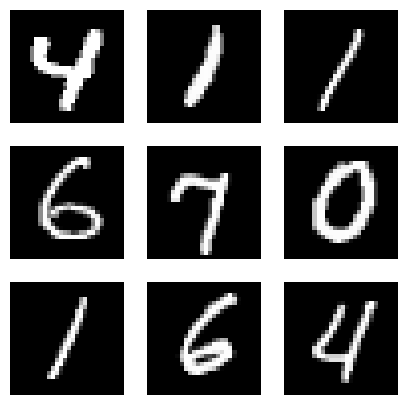

In [4]:
import numpy as np

indices = np.random.randint(0, X_train.shape[0], size=9)

images = X_train[indices]
labels = y_train[indices]

# Plot the images.
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for i in range(indices.size):
    plt.subplot(3, 3, i+1)
    image = images[i]
    plt.imshow(image, cmap="gray")
    plt.axis("off")

The images correspond to the following labels.

In [5]:
print(labels.reshape(3,3))

[[4 1 1]
 [6 7 0]
 [1 6 4]]


### Data Preprocessing

Let us One-Hot encode the labels to a 10 dimensional vector

In [6]:
from keras.utils import to_categorical

idx = 42

print(f"Before encoding: y_train[{idx}] = {y_train[idx]}.")

y_train = to_categorical(y_train)

print(f"After encoding: y_train[{idx}] = {y_train[idx]}.")

Before encoding: y_train[42] = 7.
After encoding: y_train[42] = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.].


Also encode the test labels:

In [7]:
y_test = to_categorical(y_test)

Find the dimensions of an image.

In [8]:
image_size = X_train[0].shape
image_size

(28, 28)

Scale the pixel values from 0 to 255 into the range 0 to 1.

In [9]:
X_train, X_test = X_train/255, X_test/255

### Training the Machine Learning model

We create a basic neural network using the Keras API of the Tensorflow framework, using the `Sequential` class.

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=image_size),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dropout(0.45),
  tf.keras.layers.Dense(10, activation="softmax") # 10 label classes
])

Inspect the model.

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)